# **Laboratorio: Descenso de gradiente**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##**1. Algoritmo de descenso de gradiente**

El algoritmo de descenso de gradiente es una técnica de optimización que se utiliza para encontrar locales en problemas sin restricciones. Para ello, realiza saltos de forma iterativa en la dirección contraria a la que indica el gradiente de la función objetivo evaluada. El procedimiento iterativo se describe a través del siguiente pseudoalgoritmo:

**Requerimientos iniciales:** condición inicial $x_0$, parámetro $α$, condición de parada y número máximo de iteraciones ($N_{max}$).

**Resultado:** Punto $x$ donde el gradiente es aproximadamente 0.

A continuación se presenta el pseudoalgoritmo del algoritmo de descenso de gradiente, donde $x[k]$ es un vector en $\mathbb{R}^n$ que corresponde al resultado de la iteración $k$ y $\nabla f(x)$ es el gradiente de la función evaluado en $x$.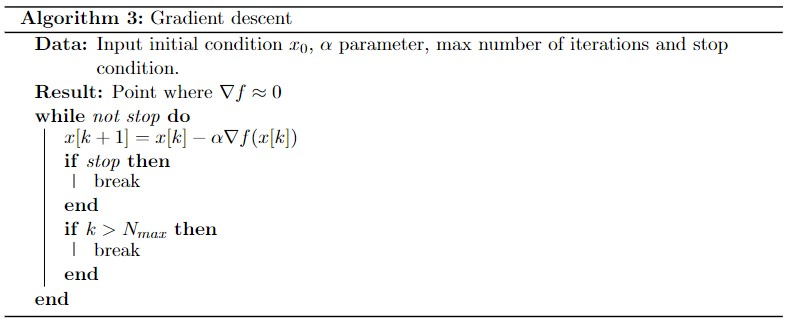

##**2. Ejemplo:**

Se requiere resolver el siguiente problema de optimización:

\begin{align*}
  \min_x f(\mathbf{x}) = \mathbf{x}^TQ\mathbf{x}+B^T\mathbf{x}+C
  \end{align*}

\begin{align*}
   x \in \mathbb{R}^2,
  \end{align*}

donde los elementos de esta formulación tienen los siguientes valores:

\begin{align}
Q = \begin{pmatrix}
1 & 0.5 \\
0.5 & 1
\end{pmatrix}
\end{align}

\begin{align}
B = \begin{pmatrix}
1/2 \\
1
\end{pmatrix}
\end{align}

\begin{align}
C= 5
\end{align}


\begin{align}
x= [x_1, x_2]^T.
\end{align}




El primer paso es definir tanto $f(x)$ reemplazando los parámetros $Q$ y $B$, como el gradiente de la función presentada.


In [ ]:
# Función
def funcion_obj(x):
  x1,x2 = x
  return x1**2 + x1*x2 + x2**2 + x1/2 + x2 + 5

#Gradiente de la función
def gradiente(x):
  x1,x2 = x
  return np.array([2*x1 + x2 + 1/2, x1 + 2*x2 + 1])

Después de esto, se define la función *desc_grad* con el algoritmo de descenso de gradiente. En esta función, tenemos la trayectoria seguida por $x[k]$ para cada una de las iteraciones de la variable en *hist*. En *hist_fun* guardamos el valor de la función objetivo en cada una de las iteraciones.

In [ ]:
def desc_grad(x0,alpha,Nmax,epsilon):
  hist = [x0]                  # Historial iniciando con condicion inicial
  hist_fun = [funcion_obj(x0)] # Historial de función objetivo iniciando con la funcion evaluada en la condicion inicial
  converge = False
  k = 0
  while k<=Nmax:
    x_n = hist[k] - alpha*gradiente(hist[k])   # Regla principal de actualizacion
    hist.append(x_n)
    hist_fun.append(funcion_obj(x_n))
    if np.linalg.norm(hist[k+1] - hist[k]) <= epsilon: # Criterio de parada
      converge=True
      break
    k+=1
  return hist,hist_fun,converge

Ahora bien, a continuación se muestra el desarrollo del algoritmo de gradiente con:

*   Tasa de aprendizaje: $α=0.3$
*   Condición inicial: $x_0=[10,2]^T$
*   Umbral para el criterio de parada: $ϵ=0.01$
*   Número máximo de iteraciones: $Nmax=100$


Con estos parámetros, se corre el algoritmo:

In [ ]:
#Se declaran los parámetros establecidos en el enunciado del ejemplo
Nmax=100              # Numero maximo de iterciones
epsilon=0.01          # Umbral para condicion de parada
x0=np.array([10,2])   # Condicion inicial

#Se utiliza la función desc_grad para x0=[10,2], alpha=0.3 y tolerancia=0.1
algoritmo=desc_grad(x0,0.3,Nmax,epsilon)

Aquí, *algoritmo* contiene la trayectoria seguida por el algoritmo de descenso de gradiente. A continuacioón, graficamos las curvas de nivel de la función objetivo junto con la trayectoria $x[k]$ recorrida por el descenso de gradiente.

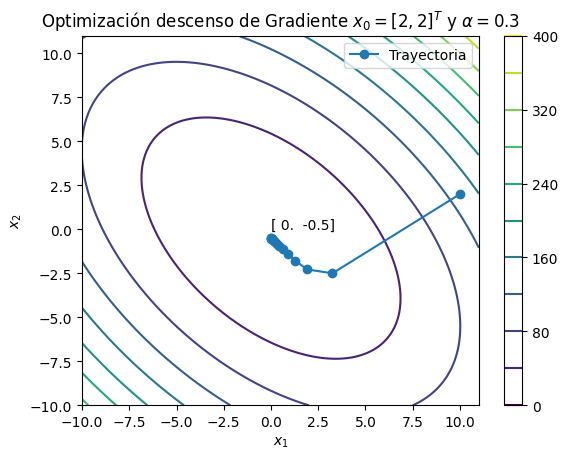

In [ ]:
#Se define una malla de puntos en el plano 2D
X1,X2=np.meshgrid(np.linspace(-10,11,100),np.linspace(-10,11,100))

#Se crea matriz de ceros con las dimensiones de la malla
Z=np.zeros((100,100))

#Se le asignan a cada posición de la matriz de ceros el valor de la función f(x)
for i in range(100):
    for j in range(100):
        Z = X1**2 + X1*X2 + X2**2 + X1/2 + X2 + 5



#Se grafican los contornos para la función y la trayectoria
fig=plt.contour(X1,X2,Z,10)
plt.plot([i[0] for i in algoritmo[0]],[i[1] for i in algoritmo[0]],'o-')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.colorbar()
plt.title('Optimización descenso de Gradiente $x_0=[2,2]^T$ y $\\alpha=0.3$')
plt.text(algoritmo[0][-1][0],algoritmo[0][-1][0],f"{np.round(algoritmo[0][-1],1)}")
plt.legend(['Trayectoria','Contorno'])
plt.show()

Vemos que el algoritmo empieza la búsqueda en $x[0]=[2,2]^T$, y sigue una trayectoria. Ahora vamos a imprimir las últimas 10 iteraciones que siguió el algoritmo (coordenadas de $x_1$ y $x_2$) para ver cómo cambian los puntos por los que pasa y cómo converge a un punto.

In [ ]:
for i, j in algoritmo[0][len(algoritmo[0])-10:]:
  print(f"({round(i,2)},{round(j,2)})")

(0.31,-0.81)
(0.22,-0.72)
(0.15,-0.65)
(0.11,-0.61)
(0.07,-0.57)
(0.05,-0.55)
(0.04,-0.54)
(0.03,-0.53)
(0.02,-0.52)
(0.01,-0.51)


Así, se observa que el descenso de gradiente estima el valor del minimizador en $[0.0, -0.5]^T$.

Por otra parte, en este problema particular, al ser $Q$ una matriz invertible, el minimizador teórico del problema puede ser obtenido al igualar el gradiente a 0. En este caso, la matriz Hessiana de la función es $2Q$, la cual es positiva definida, indicando que la función objetivo es convexa. Por la condición necesaria y suficiente de un problema convexo, cualquier punto donde el gradiente es cero es un minimizador global del problema. En este caso, el gradiente es $\nabla f(x)=2Q_sx + B$, y el punto donde el gradiente es cero es:
$$x^* = -0.5Q^{-1}B$$

Al reemplazar los valores de $Q$ y $B$ en la ecuación, tenemos que el minimizador teórico del problema es $x^*=[0,-0.5]$, corroborando que el descenso de gradiente en este problema llega al minimizador global del problema.

##**3. Ejercicios:**

####**3.1 Utilice el código del algortimo de descenso de gradiente para graficar su trayectoria con un $\alpha$ de 0.1**

#### **3.2 Utilice el código del algortimo de descenso de gradiente para graficar su trayectoria con un $\alpha$ de 0.5**

####**3.3 Teniendo en cuenta los resultados obtenidos, responda: ¿Que valor de $α$ considera que fue el mejor? ¿por qué?**